# Ranking NTAs

Short explanation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
reduced_311_path = "data/311_selected_columns.pkl"
sample_path = "data/311_samples.pkl"

In [3]:
#df_311 = pd.read_pickle(reduced_311_path)
#df_311 = df_311.sample(200000)
#df_311.to_pickle(sample_path)
#df_311.head()

In [4]:
cleaned_311_path = "data/NTA_and_CTC_output.pkl"
nta_path = "data/Neighborhood Tabulation Areas.geojson"
nta_population_path = "data/New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv"

In [5]:
df_311 = pd.read_pickle(cleaned_311_path)
df_311.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Latitude,Longitude,Complaint Type Class Index,Complaint Type Class,NTA
Unique Key,,,,,,,,,,
37857327,2017-12-05 17:05:59,NaT,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,40.605687,-74.169239,1,private property condition,SI05
33535675,2016-06-07 15:31:47,2016-06-07 19:24:11,NYPD,New York City Police Department,Blocked Driveway,40.747416,-73.856462,3,human activity disturbance,QN25
18828629,2010-10-04 00:00:00,2010-10-05 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,40.840492,-73.909854,1,private property condition,BX14
23332432,2012-05-31 00:00:00,2012-06-18 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,40.707743,-73.800810,0,noise annoyance,QN61
37480015,2017-10-20 00:00:00,2017-10-27 16:26:19,DOHMH,Department of Health and Mental Hygiene,Rodent,40.702458,-73.895701,4,pest,QN20


In [6]:
# Add columns for date, weekday and hour of creation
df_311["Created Year"] = df_311["Created Date"].dt.year
df_311["Created Day"] = df_311["Created Date"].dt.date
df_311["Created Hour"] = df_311["Created Date"].dt.hour
df_311["Created Weekday"] = df_311["Created Date"].dt.dayofweek

df_311.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Latitude,Longitude,Complaint Type Class Index,Complaint Type Class,NTA,Created Year,Created Day,Created Hour,Created Weekday
Unique Key,,,,,,,,,,,,,,
37857327,2017-12-05 17:05:59,NaT,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,40.605687,-74.169239,1,private property condition,SI05,2017,2017-12-05,17,1
33535675,2016-06-07 15:31:47,2016-06-07 19:24:11,NYPD,New York City Police Department,Blocked Driveway,40.747416,-73.856462,3,human activity disturbance,QN25,2016,2016-06-07,15,1
18828629,2010-10-04 00:00:00,2010-10-05 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,40.840492,-73.909854,1,private property condition,BX14,2010,2010-10-04,0,0
23332432,2012-05-31 00:00:00,2012-06-18 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,40.707743,-73.800810,0,noise annoyance,QN61,2012,2012-05-31,0,3
37480015,2017-10-20 00:00:00,2017-10-27 16:26:19,DOHMH,Department of Health and Mental Hygiene,Rodent,40.702458,-73.895701,4,pest,QN20,2017,2017-10-20,0,4


### Yearly evolution

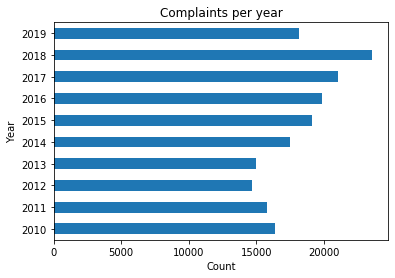

In [44]:
yearly_complaints = df_311.groupby("Created Year") \
                          .count()["Created Date"] \

ax = yearly_complaints.plot.barh()
ax.set_title("Complaints per year")
ax.set_xlabel("Count")
ax.set_ylabel("Year");

In [45]:
yearly_complaints = yearly_complaints.reset_index().rename(columns={"Created Date": "Yearly complaints"})
yearly_complaints.head()

,Created Year,Yearly complaints
0,2010,16369
1,2011,15835
2,2012,14687
3,2013,15012
4,2014,17481


### Types of complaints

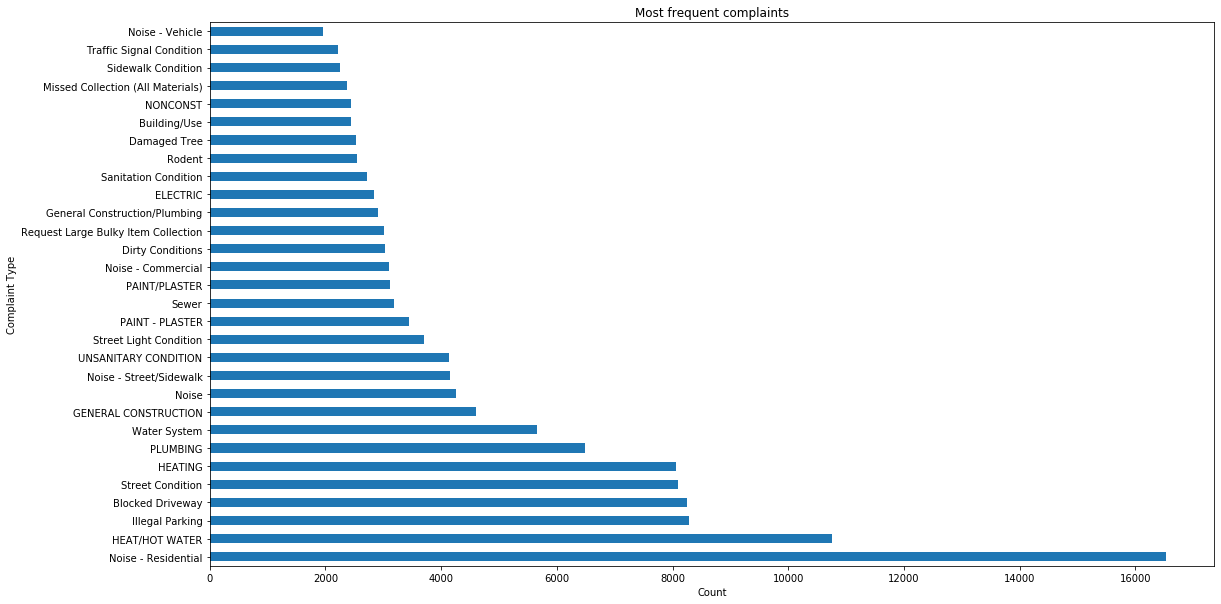

In [46]:
complaint_types = df_311.groupby("Complaint Type") \
                        .count()["Created Date"] \
                        .rename(columns={"Created Date": "Number of complaints"}) \
                        .sort_values(ascending=False)[:30]

ax = complaint_types.plot.barh(figsize=(18,10))
ax.set_title("Most frequent complaints")
ax.set_xlabel("Count")
ax.set_ylabel("Complaint Type");

### Neighborhood Tabulation Areas (NTAs)

In [47]:
nta_pop_df = pd.read_csv(nta_population_path)
nta_pop_df = nta_pop_df[nta_pop_df["Year"] == 2010][["NTA Code", "NTA Name", "Population"]].set_index("NTA Code")

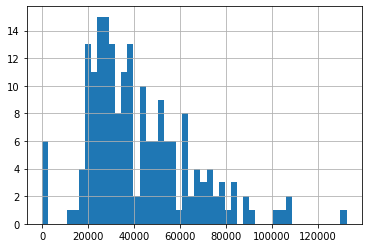

In [48]:
nta_pop_df.sort_values(by="Population")["Population"].hist(bins=50);

In [49]:
nta_pop_df[nta_pop_df.Population < 10000]

,NTA Name,Population
NTA Code,,
BX99,park-cemetery-etc-Bronx,1906
BK99,park-cemetery-etc-Brooklyn,418
MN99,park-cemetery-etc-Manhattan,1849
QN98,Airport,0
QN99,park-cemetery-etc-Queens,436
SI99,park-cemetery-etc-Staten Island,0


In [50]:
nta_pop_df[nta_pop_df.Population > 10000]

,NTA Name,Population
NTA Code,,
BX01,Claremont-Bathgate,31078
BX03,Eastchester-Edenwald-Baychester,34517
BX05,Bedford Park-Fordham North,54415
BX06,Belmont,27378
BX07,Bronxdale,35538
...,...,...
SI36,Old Town-Dongan Hills-South Beach,24835
SI37,Stapleton-Rosebank,26453
SI45,New Dorp-Midland Beach,21896


In [51]:
invalid_ntas = nta_pop_df[nta_pop_df.Population < 10000].index.tolist()

In [52]:
invalid_ntas

['BX99', 'BK99', 'MN99', 'QN98', 'QN99', 'SI99']

In [53]:
df_311 = df_311[~df_311.NTA.isin(invalid_ntas)]
df_311.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Latitude,Longitude,Complaint Type Class Index,Complaint Type Class,NTA,Created Year,Created Day,Created Hour,Created Weekday
Unique Key,,,,,,,,,,,,,,
37857327,2017-12-05 17:05:59,NaT,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,40.605687,-74.169239,1,private property condition,SI05,2017,2017-12-05,17,1
33535675,2016-06-07 15:31:47,2016-06-07 19:24:11,NYPD,New York City Police Department,Blocked Driveway,40.747416,-73.856462,3,human activity disturbance,QN25,2016,2016-06-07,15,1
18828629,2010-10-04 00:00:00,2010-10-05 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,40.840492,-73.909854,1,private property condition,BX14,2010,2010-10-04,0,0
23332432,2012-05-31 00:00:00,2012-06-18 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,40.707743,-73.800810,0,noise annoyance,QN61,2012,2012-05-31,0,3
37480015,2017-10-20 00:00:00,2017-10-27 16:26:19,DOHMH,Department of Health and Mental Hygiene,Rodent,40.702458,-73.895701,4,pest,QN20,2017,2017-10-20,0,4


In [54]:
nta_complaints = df_311.groupby("NTA") \
                       .count()["Created Date"] \
                       .reset_index() \
                       .rename(columns={"Created Date": "Number of complaints"})

nta_complaints = nta_complaints.merge(nta_pop_df, left_on="NTA", right_index=True).set_index("NTA")
      
nta_complaints.head()

,Number of complaints,NTA Name,Population
NTA,,,
BK09,411,Brooklyn Heights-Cobble Hill,22887
BK17,1261,Sheepshead Bay-Gerritsen Beach-Manhattn Bch,64518
BK19,683,Brighton Beach,35547
BK21,505,Seagate-Coney Island,31965
BK23,101,West Brighton,17750


In [55]:
nta_complaints["Complaints per 1k capita"] = 1000 * nta_complaints["Number of complaints"] / nta_complaints["Population"]
nta_complaints.head(20)

,Number of complaints,NTA Name,Population,Complaints per 1k capita
NTA,,,,
BK09,411,Brooklyn Heights-Cobble Hill,22887,17.957793
BK17,1261,Sheepshead Bay-Gerritsen Beach-Manhattn Bch,64518,19.544933
BK19,683,Brighton Beach,35547,19.213998
BK21,505,Seagate-Coney Island,31965,15.798530
BK23,101,West Brighton,17750,5.690141
BK25,854,Homecrest,44316,19.270692
BK26,448,Gravesend,29436,15.219459
BK27,583,Bath Beach,29931,19.478133
BK28,1440,Bensonhurst West,88727,16.229558


In [56]:
nta_complaints["Number of complaints rank"] = nta_complaints["Number of complaints"].rank(method="first")
nta_complaints["Complaints per 1k capita rank"] = nta_complaints["Complaints per 1k capita"].rank(method="first")
nta_complaints = nta_complaints.sort_values(by="Complaints per 1k capita rank")
nta_complaints.head(20)

,Number of complaints,NTA Name,Population,Complaints per 1k capita,Number of complaints rank,Complaints per 1k capita rank
NTA,,,,,,
BX98,3,Rikers Island,11091,0.270490,1.0,1.0
MN50,100,Stuyvesant Town-Cooper Village,21049,4.750820,3.0,2.0
BK23,101,West Brighton,17750,5.690141,4.0,3.0
BK93,82,Starrett City,13354,6.140482,2.0,4.0
BX13,311,Co-Op City,43752,7.108246,7.0,5.0
BK72,323,Williamsburg,32926,9.809877,10.0,6.0
QN47,224,Ft. Totten-Bay Terrace-Clearview,21751,10.298377,5.0,7.0
MN31,902,Lenox Hill-Roosevelt Island,80771,11.167374,111.0,8.0
BX46,355,Parkchester,29821,11.904363,11.0,9.0


In [80]:
nta_yearly_complaints = df_311.groupby(["NTA", "Created Year"]) \
                              .count()["Created Date"] \
                              .reset_index() \
                              .rename(columns={"Created Date": "Total complaints"})

In [81]:
nta_yearly_complaints.head()

,NTA,Created Year,Total complaints
0,BK09,2010,27
1,BK09,2011,39
2,BK09,2012,30
3,BK09,2013,39
4,BK09,2014,38


In [82]:
nta_yearly_complaints = nta_yearly_complaints.merge(yearly_complaints, on="Created Year")
nta_yearly_complaints = nta_yearly_complaints.merge(nta_pop_df, left_on="NTA", right_index=True)

In [83]:
nta_yearly_complaints.head()

,NTA,Created Year,Total complaints,Yearly complaints,NTA Name,Population
0,BK09,2010,27,16369,Brooklyn Heights-Cobble Hill,22887
188,BK09,2011,39,15835,Brooklyn Heights-Cobble Hill,22887
376,BK09,2012,30,14687,Brooklyn Heights-Cobble Hill,22887
564,BK09,2013,39,15012,Brooklyn Heights-Cobble Hill,22887
753,BK09,2014,38,17481,Brooklyn Heights-Cobble Hill,22887


In [84]:
nta_yearly_complaints["Complaints per 30k capita"] = 30000 * nta_yearly_complaints["Total complaints"] / nta_yearly_complaints["Population"]
nta_yearly_complaints.head()

,NTA,Created Year,Total complaints,Yearly complaints,NTA Name,Population,Complaints per 30k capita
0,BK09,2010,27,16369,Brooklyn Heights-Cobble Hill,22887,35.391270
188,BK09,2011,39,15835,Brooklyn Heights-Cobble Hill,22887,51.120724
376,BK09,2012,30,14687,Brooklyn Heights-Cobble Hill,22887,39.323634
564,BK09,2013,39,15012,Brooklyn Heights-Cobble Hill,22887,51.120724
753,BK09,2014,38,17481,Brooklyn Heights-Cobble Hill,22887,49.809936


In [85]:
nta_yearly_complaints["Fraction of yearly complaints per 30k capita"] = 100 * nta_yearly_complaints["Complaints per 30k capita"] / nta_yearly_complaints["Yearly complaints"]
nta_yearly_complaints.head()

,NTA,Created Year,Total complaints,Yearly complaints,NTA Name,Population,Complaints per 30k capita,Fraction of yearly complaints per 30k capita
0,BK09,2010,27,16369,Brooklyn Heights-Cobble Hill,22887,35.391270,0.216209
188,BK09,2011,39,15835,Brooklyn Heights-Cobble Hill,22887,51.120724,0.322834
376,BK09,2012,30,14687,Brooklyn Heights-Cobble Hill,22887,39.323634,0.267744
564,BK09,2013,39,15012,Brooklyn Heights-Cobble Hill,22887,51.120724,0.340532
753,BK09,2014,38,17481,Brooklyn Heights-Cobble Hill,22887,49.809936,0.284938


In [90]:
nta_yearly_complaints.sort_values("Fraction of yearly complaints per 30k capita", ascending=False)

,NTA,Created Year,Total complaints,Yearly complaints,NTA Name,Population,Complaints per 30k capita,Fraction of yearly complaints per 30k capita
1225,MN17,2016,266,19877,Midtown-Midtown South,28630,278.728606,1.402267
472,MN17,2012,163,14687,Midtown-Midtown South,28630,170.799860,1.162932
1037,MN17,2015,205,19113,Midtown-Midtown South,28630,214.809640,1.123893
661,MN17,2013,161,15012,Midtown-Midtown South,28630,168.704156,1.123795
1790,MN17,2019,188,18151,Midtown-Midtown South,28630,196.996158,1.085318
...,...,...,...,...,...,...,...,...
1698,BK23,2019,6,18151,West Brighton,17750,10.140845,0.055869
800,BK93,2014,4,17481,Starrett City,13354,8.986072,0.051405
1431,MN50,2017,5,21046,Stuyvesant Town-Cooper Village,21049,7.126229,0.033860
1403,BX98,2017,2,21046,Rikers Island,11091,5.409792,0.025705


In [91]:
nta_yearly_complaints[nta_yearly_complaints.NTA == "MN17"]

,NTA,Created Year,Total complaints,Yearly complaints,NTA Name,Population,Complaints per 30k capita,Fraction of yearly complaints per 30k capita
96,MN17,2010,134,16369,Midtown-Midtown South,28630,140.412155,0.857793
284,MN17,2011,155,15835,Midtown-Midtown South,28630,162.417045,1.025684
472,MN17,2012,163,14687,Midtown-Midtown South,28630,170.799860,1.162932
661,MN17,2013,161,15012,Midtown-Midtown South,28630,168.704156,1.123795
849,MN17,2014,161,17481,Midtown-Midtown South,28630,168.704156,0.965072
1037,MN17,2015,205,19113,Midtown-Midtown South,28630,214.809640,1.123893
1225,MN17,2016,266,19877,Midtown-Midtown South,28630,278.728606,1.402267
1414,MN17,2017,199,21046,Midtown-Midtown South,28630,208.522529,0.990794
1602,MN17,2018,209,23605,Midtown-Midtown South,28630,219.001048,0.927774
1790,MN17,2019,188,18151,Midtown-Midtown South,28630,196.996158,1.085318


# Not in the final report

In [87]:
yearly_nta_complaints = df_311.groupby(["Created Year", "NTA"]) \
                              .count()["Created Date"] \

nta_pcts = yearly_nta_complaints.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [38]:
yearly_nta_complaints

Created Year  NTA 
2010          BK09    27
              BK17    88
              BK19    75
              BK21    55
              BK23     7
                      ..
2019          SI36    37
              SI37    75
              SI45    47
              SI48    41
              SI54    95
Name: Created Date, Length: 1882, dtype: int64

In [39]:
nta_pcts

Created Year  NTA 
2010          BK09    0.165006
              BK17    0.537799
              BK19    0.458351
              BK21    0.336124
              BK23    0.042779
                        ...   
2019          SI36    0.203902
              SI37    0.413314
              SI45    0.259010
              SI48    0.225945
              SI54    0.523531
Name: Created Date, Length: 1882, dtype: float64

In [40]:
nta_evolution = nta_pcts.reset_index().merge(nta_pop_df, left_on="NTA", right_index=True)

nta_evolution = nta_evolution.pivot("NTA Name", "Created Year", "Created Date")
nta_evolution.head()

Created Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
NTA Name,,,,,,,,,,
Allerton-Pelham Gardens,0.293345,0.303183,0.285987,0.166622,0.234607,0.214559,0.286792,0.332652,0.292398,0.286565
Annadale-Huguenot-Prince's Bay-Eltingville,0.250565,0.378979,0.217895,0.299920,0.291829,0.293056,0.271698,0.308891,0.296635,0.407803
Arden Heights,0.189452,0.214755,0.333651,0.213276,0.223163,0.193626,0.181132,0.204343,0.266972,0.225945
Astoria,0.708916,0.764275,0.796677,0.779792,0.875486,0.879167,0.820126,0.822126,0.775489,0.887248
Auburndale,0.262788,0.126326,0.190658,0.206612,0.165942,0.193626,0.161006,0.232857,0.241546,0.214923


In [41]:
years = nta_evolution.columns.tolist()

In [42]:
new_columns = []
for year, next_year in zip(years, years[1:]): 
    new_column_name = f"Change from {year} to {next_year}"
    nta_evolution[new_column_name] = 100 * (nta_evolution[next_year] - nta_evolution[year]) / nta_evolution[year]
    new_columns.append(new_column_name)

In [43]:
nta_evolution

Created Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Change from 2010 to 2011,Change from 2011 to 2012,Change from 2012 to 2013,Change from 2013 to 2014,Change from 2014 to 2015,Change from 2015 to 2016,Change from 2016 to 2017,Change from 2017 to 2018,Change from 2018 to 2019
NTA Name,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,0.293345,0.303183,0.285987,0.166622,0.234607,0.214559,0.286792,0.332652,0.292398,0.286565,3.353967,-5.672069,-41.737759,40.802014,-8.545711,33.666268,15.990566,-12.101086,-1.994930
Annadale-Huguenot-Prince's Bay-Eltingville,0.250565,0.378979,0.217895,0.299920,0.291829,0.293056,0.271698,0.308891,0.296635,0.407803,51.249707,-42.504880,37.644545,-2.697795,0.420395,-7.287871,13.689166,-3.967742,37.476343
Arden Heights,0.189452,0.214755,0.333651,0.213276,0.223163,0.193626,0.181132,0.204343,0.266972,0.225945,13.355963,55.363652,-36.077998,4.635643,-13.235675,-6.452626,12.814634,30.648537,-15.367417
Astoria,0.708916,0.764275,0.796677,0.779792,0.875486,0.879167,0.820126,0.822126,0.775489,0.887248,7.808879,4.239603,-2.119435,12.271775,0.420395,-6.715574,0.243906,-5.672691,14.411341
Auburndale,0.262788,0.126326,0.190658,0.206612,0.165942,0.193626,0.161006,0.232857,0.241546,0.214923,-51.928388,50.924690,8.367769,-19.684138,16.683058,-16.846779,44.625737,3.731638,-11.021713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windsor Terrace,0.220009,0.221071,0.258750,0.259931,0.143053,0.172693,0.150943,0.171078,0.211882,0.220434,0.483023,17.043637,0.456370,-44.964816,20.719661,-12.594626,13.339353,23.851127,4.036151
Woodhaven,0.617246,0.701112,0.762631,0.706478,0.703822,0.727406,0.633962,0.727083,0.783965,0.771520,13.587033,8.774551,-7.363037,-0.375933,3.350781,-12.846152,14.688631,7.823334,-1.587425
Woodlawn-Wakefield,0.476685,0.530571,0.503881,0.566516,0.606546,0.664608,0.684277,0.575013,0.593271,0.501488,11.304272,-5.030382,12.430379,7.066094,9.572591,2.959402,-15.967759,3.175154,-15.470627


In [44]:
nta_evolution[new_columns].mean(axis=1)

NTA Name
Allerton-Pelham Gardens                       2.640140
Annadale-Huguenot-Prince's Bay-Eltingville    9.335763
Arden Heights                                 5.076079
Astoria                                       2.765356
Auburndale                                    2.761319
                                                ...   
Windsor Terrace                               2.485542
Woodhaven                                     2.894643
Woodlawn-Wakefield                            1.115458
Woodside                                      0.740039
Yorkville                                    -2.336064
Length: 189, dtype: float64

In [92]:
df_extract = pd.read_csv("data/extract.csv")

/home/julien/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
df_extract.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [94]:
df_extract["Descriptor"]

0                                            HEAT
1                                      Controller
2                                  APARTMENT ONLY
3        Debris - Falling Or In Danger Of Falling
4                                 Image of Ticket
                           ...                   
19995                            Street Light Out
19996                             Blocked Hydrant
19997                                        HEAT
19998                                       FLOOR
19999                            Blocked Sidewalk
Name: Descriptor, Length: 20000, dtype: object

In [100]:
print(df_extract.iloc[0])

Unique Key                                                                 24309212
Created Date                                                 11/03/2012 12:00:00 AM
Closed Date                                                  11/07/2012 12:00:00 AM
Agency                                                                          HPD
Agency Name                       Department of Housing Preservation and Develop...
Complaint Type                                                              HEATING
Descriptor                                                                     HEAT
Location Type                                                  RESIDENTIAL BUILDING
Incident Zip                                                                  10075
Incident Address                                                 308 EAST 80 STREET
Street Name                                                          EAST 80 STREET
Cross Street 1                                                             2

In [98]:
n_descriptions = 10
for i in range(n_descriptions):
    print(df_extract.iloc[i]['Resolution Description'])

The Department of Housing Preservation and Development was not able to gain access to your apartment or others in the building to inspect for a lack of heat or hot water. The complaint has been closed. If the condition still exists, please file a new complaint.
Service Request status for this request is available on the Department of Transportationâs website. Please click the âLearn Moreâ link below.
The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.
The Department of Buildings investigated this complaint and issued an Office of Administrative Trials and Hearings (OATH) summons.
A copy of the requested document was mailed.
The Police Department responded to the complaint and determined that police ac